In [1]:
import skimage.io as skio
import matplotlib.pyplot as plt
import numpy as np
from skimage import transform, feature, color, draw

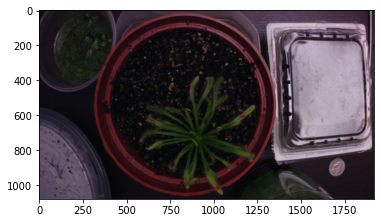

In [2]:
url = "https://storage.googleapis.com/acmiyaguchi/pinecube/captures_v2/202109090300.jpeg"
img = skio.imread(url)
plt.imshow(img)

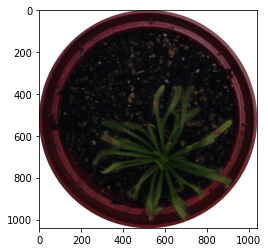

In [3]:
def crop_circle(img, inner_radius=515, outer_radius=525):
    edges = feature.canny(color.rgb2gray(img))
    
    # 720p: inner pot is around r=302, inner lid is around r=334, outerlid is r=344
    # 1080p: outerlid is r=520, depends on how the camera is handled though
    hough_radii = np.arange(inner_radius, outer_radius, 1)
    hough_res = transform.hough_circle(edges, hough_radii)
    accums, cx, cy, radii = transform.hough_circle_peaks(
        hough_res,
        hough_radii,
        total_num_peaks=1
    )
    
    image = np.dstack((img, np.ones(img.shape[:2]).astype(np.uint8)*255))
    mask = np.zeros(image.shape, dtype=bool)
    cyy, cxx, rr = list(zip(cy, cx, radii))[0]
    mask[draw.disk((cyy, cxx), rr, shape=image.shape)] = 1
    
    return (image*mask)[cyy-rr:cyy+rr, cxx-rr:cxx+rr]
    
res = crop_circle(img)
plt.imshow(res)
plt.show()

In [4]:
res.shape

(1040, 1040, 4)

In [5]:
skio.imsave("02-cropped-plant.png", res)